<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
BREAST CANCER PREDICTION</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
IMPORT LIBRABRIES WHICH REQUIRED FOR THE PROJECT<h1>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, log_loss 

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
IMPORT DATA </h1>

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE WE HAVE THE TESTING REPORTS OF PATIENTS WITH THERE ID'S  AND THE DIAGNOSIS RESULTS ALSO GIVEN<br>
PURPOSE :  TO ANALYS THE REPORT AND PREDICT THE NEW PERSON DIGNOSIS </h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
EXPLORATORY DATA ANALYSIS<h1>

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
IMPORT THE SEABORN FOR VISUAL CHECK OF DATA<br>
BY HEATMAP CHART WE CAN CORELATE THE EVERY PARAMETER WITH EACH OTHER<br>
HERE WE CAN KNOW WHAT PERCENT OF CORELATION WITH OTHER CAN BE VISUALLY AND NUMERICALLY SEEN<h1>

In [6]:
import seaborn as sns

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<Axes: >

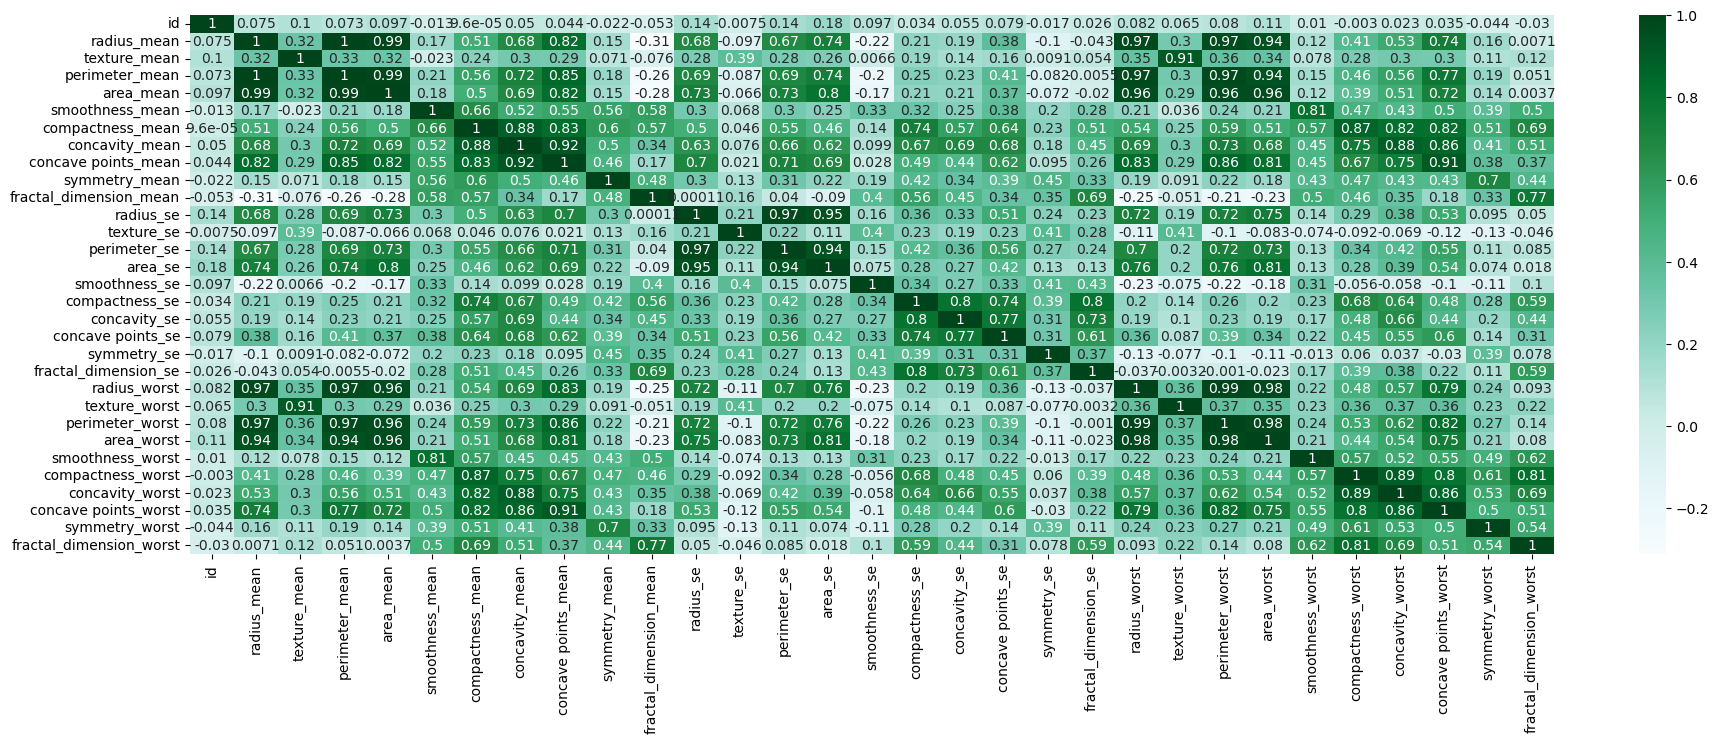

In [8]:
plt.figure(figsize=(22,7))
cor = df.drop(['diagnosis'], axis =1)
sns.heatmap(cor.corr(), cmap= 'BuGn', annot=True)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE WE CAN SEE HOW MANY RESULTS IN DIAGONSIS AND WHAT QTY OF PEOPLE GOT POSITIVE AND NEGITIVE<h1>

Text(0.5, 1.0, 'id vs diagonasis')

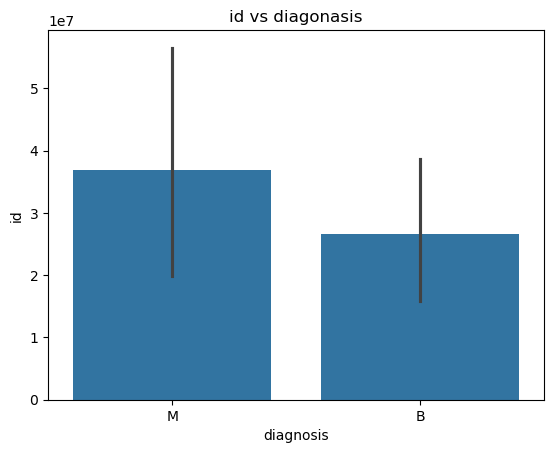

In [9]:
sns.barplot(x =df['diagnosis'],y =df['id'], data = df)

plt.title("id vs diagonasis")

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE WE ARE DIVIDING THE ANALYISED DATA AND RESULTANT TO MAKE IT IN X - AXIS<h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Mdoelling the Data using Logistic Regression Algorithm<h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE WE SEPARATE RESULTANT FROM DATA AS IT GIVES THE RESULT   Y = MX + <h1>

In [10]:
x = df.drop(columns=['diagnosis']).astype(float).values


In [11]:
y = df.diagnosis.copy()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
M = 1 and B =0  Converting y to numerical outcomes easy for the calculations <h1>

In [12]:
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

 <h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE DIVIDING THE TEST AND TRAIN DATA AND SPLIT IT INTO 4 PART OF DATA<h1>

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [15]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(455, 31) (114, 31) (455,) (114,)


In [16]:
x_train

array([[8.97880000e+05, 1.00500000e+01, 1.75300000e+01, ...,
        6.49900000e-02, 2.89400000e-01, 7.66400000e-02],
       [9.07450000e+04, 1.08000000e+01, 2.19800000e+01, ...,
        7.48500000e-02, 2.96500000e-01, 7.66200000e-02],
       [9.05189000e+05, 1.61400000e+01, 1.48600000e+01, ...,
        1.12900000e-01, 2.77800000e-01, 7.01200000e-02],
       ...,
       [9.01034301e+08, 9.43600000e+00, 1.83200000e+01, ...,
        5.05200000e-02, 2.45400000e-01, 8.13600000e-02],
       [8.75099000e+05, 9.72000000e+00, 1.82200000e+01, ...,
        0.00000000e+00, 1.90900000e-01, 6.55900000e-02],
       [9.25291000e+05, 1.15100000e+01, 2.39300000e+01, ...,
        9.65300000e-02, 2.11200000e-01, 8.73200000e-02]])

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
HERE THE RESULT ONLY 2 RESULTANTS ARE AVAIALBLE "M" AND "B" SO WE USE LOGISTIC REGRESSION PROCESS<br>
FIRST WE SHOULD TRANFORM THE VALUES IN THE DATA FROM 0 TO 1<h1>

## Feature scaling (Standardization):
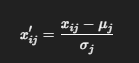

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
X_train_s = scaler.transform(x_train)
X_test_s = scaler.transform(x_test)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Add intercept column to x for custom MLE implementation
</h1>

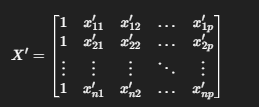

In [18]:
def add_intercept(x):
    return np.hstack([np.ones((x.shape[0],1)),x])

In [19]:
x_train_int =add_intercept(X_train_s)
x_test_int = add_intercept(X_test_s)

In [20]:
x_train_int.shape

(455, 32)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
ir =LogisticRegression(random_state=0)

In [23]:
ir.fit(X_train_s, y_train)
prob = ir.predict_proba(X_test_s)[:,1]
print("AUC :", roc_auc_score(y_test,prob))
print(classification_report(y_test, ir.predict(X_test_s)))

AUC : 0.985709749126707
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, ir.predict(X_test_s))
print(cm)
accuracy_score(y_test, ir.predict(X_test_s))

[[65  2]
 [ 2 45]]


0.9649122807017544

In [25]:
y_pred = ir.predict(x_train)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

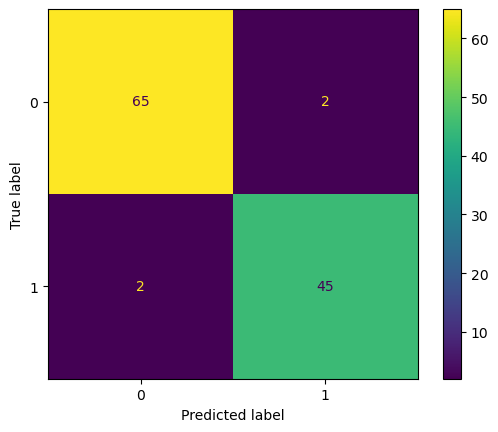

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ir, X_test_s, y_test)

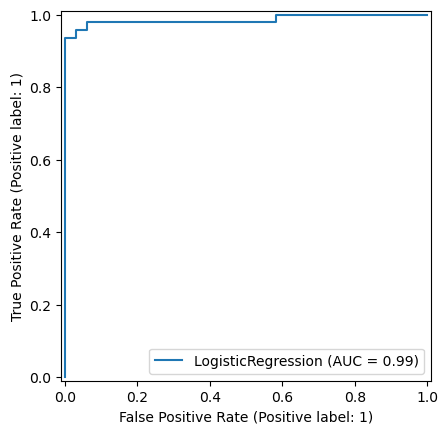

In [28]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(ir,X_test_s,y_test)

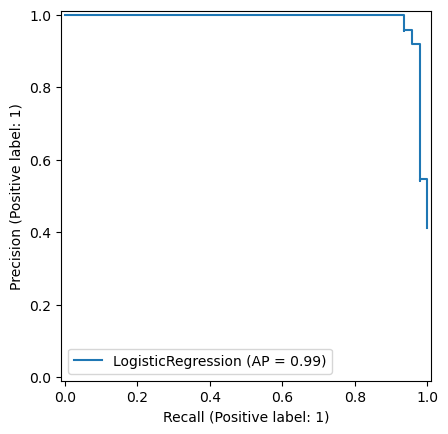

In [29]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(ir,X_test_s,y_test)

Text(0, 0.5, 'Frequency')

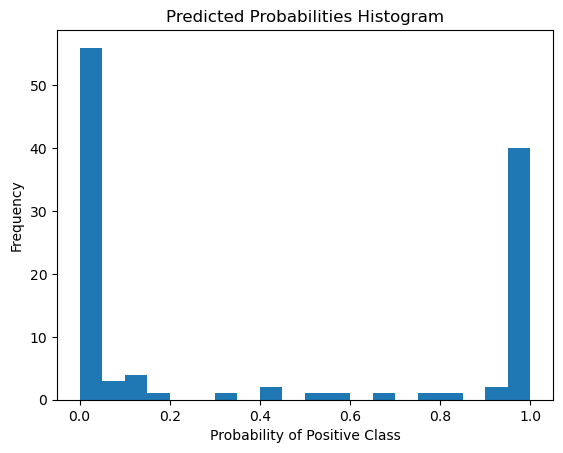

In [30]:
import matplotlib.pyplot as plt
probs = ir.predict_proba(X_test_s)[:, 1]
plt.hist(probs, bins=20)
plt.title("Predicted Probabilities Histogram")
plt.xlabel("Probability of Positive Class")
plt.ylabel("Frequency")

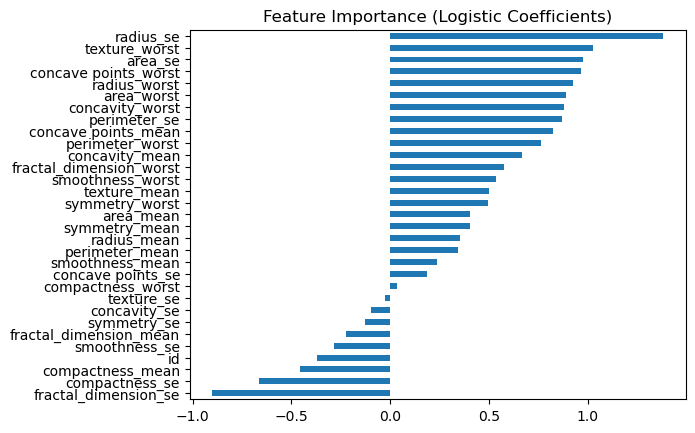

In [31]:
a = df.drop(['diagnosis'], axis =1)
coefficients = pd.Series(ir.coef_[0], index=a.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Coefficients)")
plt.show()


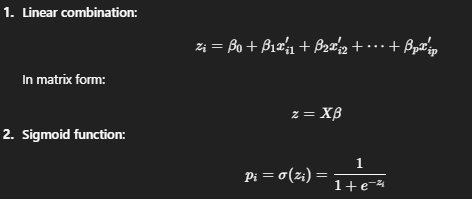  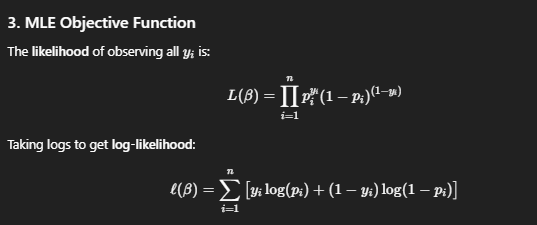   

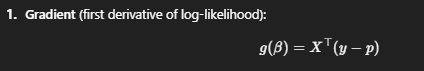  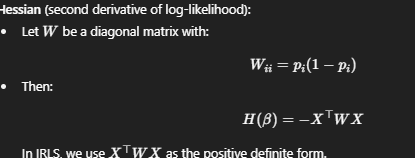

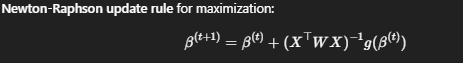  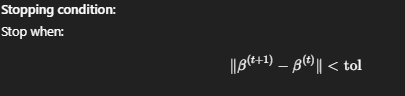

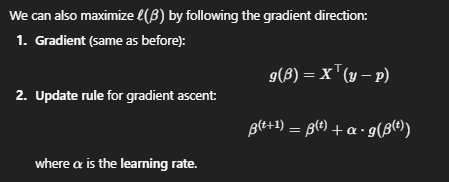  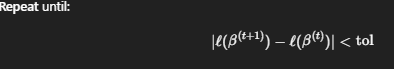

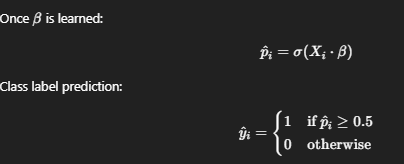  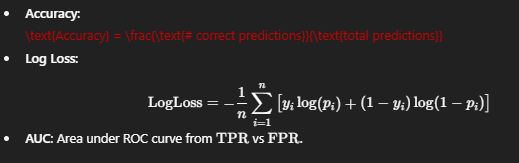

In [32]:
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def irls_logistic(x, y, max_iter=10, tol=1e-6, verbose=False):
    n, p = x.shape
    beta = np.zeros(p)
    
    for it in range(max_iter):
        z = x.dot(beta)
        p_hat = sigmoid(z)
        w = p_hat * (1 - p_hat)

        # Avoid zero weights
        if np.any(w == 0):
            w = np.clip(w, 1e-8, None)

        # Gradient: g = X^T (y - p)
        gradient = x.T.dot(y - p_hat)

        # Hessian: H = X^T W X (positive definite for maximization step)
        Xw = x * w[:, np.newaxis]
        H = x.T.dot(Xw)

        try:
            delta = np.linalg.solve(H, gradient)
        except np.linalg.LinAlgError:
            reg = 1e-6 * np.eye(p)  # small regularization
            delta = np.linalg.solve(H + reg, gradient)

        beta_new = beta + delta

        if verbose:
            ll = np.sum(
                y * np.log(p_hat + 1e-15) + 
                (1 - y) * np.log(1 - p_hat + 1e-15)
            )
            print(f"iter {it:03d}, ll={ll:.6f}, ||delta||={np.linalg.norm(delta):.6e}")

        # Convergence check
        if np.linalg.norm(delta) < tol:
            beta = beta_new
            break

        beta = beta_new

    return beta


In [33]:
beta_irls = irls_logistic(x_train_int, y_train, verbose=True)
print("IRLS beta:", beta_irls)

iter 000, ll=-315.381967, ||delta||=4.857943e+00
iter 001, ll=-106.483659, ||delta||=2.367000e+00
iter 002, ll=-61.226109, ||delta||=5.714372e+00
iter 003, ll=-39.646770, ||delta||=1.458616e+01
iter 004, ll=-27.849964, ||delta||=2.729579e+01
iter 005, ll=-20.225712, ||delta||=4.203720e+01
iter 006, ll=-14.244599, ||delta||=6.987197e+01
iter 007, ll=-9.460860, ||delta||=1.400360e+02
iter 008, ll=-4.768018, ||delta||=1.799220e+02
iter 009, ll=-1.863273, ||delta||=2.107717e+02
IRLS beta: [  -7.64986581  -12.87777474 -451.57999704    5.42662159  491.98675839
    2.81596924   11.15870008  -61.32689712    8.15002712    4.74621444
    3.97494791    2.94137623   68.43137313    2.05301194  -51.44684772
   21.26377825   -9.79825637   35.87817703  -16.02019566   14.78771196
   -4.38199915  -60.15034268   59.96201188    5.77926644    1.12665152
  -61.17749374    4.64700414  -28.17900418   21.54954538    4.2109234
    7.3915805    37.51468466]


In [34]:
probs_irls = sigmoid(x_test_int.dot(beta_irls))
print("IRLS AUC:", roc_auc_score(y_test, probs_irls))
print("IRLS Log loss:", log_loss(y_test, probs_irls))

IRLS AUC: 0.9676087646872022
IRLS Log loss: 1.1808795523338564


In [35]:
def log_likelihood(x,y,beta):
    p = sigmoid(x.dot(beta))
    return np.sum(y*np.log(p + 1e-15) + (1-y)* np.log(1-p + 1e-15))
    

In [36]:
def grad_ascent(x,y, ir=0.1, max_iter=10000,tol=1e-6, verbose=False):
    n,p = x.shape
    beta = np.zeros(p)
    prev_ll = -np.inf
    for it in range(max_iter):
        p_hat = sigmoid(x.dot(beta))
        grad = x.T.dot(y - p_hat)
        beta = beta + ir *grad
        if it %100 ==0 or it == max_iter-1:
            ll = log_likelihood(x,y, beta)
            if verbose:
                print(f"iter {it:05d}, ll={11:.6f}")
            if abs(ll -prev_ll) <tol:
                break
            prev_ll =ll
    return beta

In [37]:
beta_grad = grad_ascent(x_train_int, y_train, ir=1e-3, max_iter=20000, verbose=True)
print("Gradient-ascent beta:", beta_grad)
probs_grad = sigmoid(x_test_int.dot(beta_grad))
print("Grad AUC:", roc_auc_score(y_test, probs_grad))


iter 00000, ll=11.000000
iter 00100, ll=11.000000
iter 00200, ll=11.000000
iter 00300, ll=11.000000
iter 00400, ll=11.000000
iter 00500, ll=11.000000
iter 00600, ll=11.000000
iter 00700, ll=11.000000
iter 00800, ll=11.000000
iter 00900, ll=11.000000
iter 01000, ll=11.000000
iter 01100, ll=11.000000
iter 01200, ll=11.000000
iter 01300, ll=11.000000
iter 01400, ll=11.000000
iter 01500, ll=11.000000
iter 01600, ll=11.000000
iter 01700, ll=11.000000
iter 01800, ll=11.000000
iter 01900, ll=11.000000
iter 02000, ll=11.000000
iter 02100, ll=11.000000
iter 02200, ll=11.000000
iter 02300, ll=11.000000
iter 02400, ll=11.000000
iter 02500, ll=11.000000
iter 02600, ll=11.000000
iter 02700, ll=11.000000
iter 02800, ll=11.000000
iter 02900, ll=11.000000
iter 03000, ll=11.000000
iter 03100, ll=11.000000
iter 03200, ll=11.000000
iter 03300, ll=11.000000
iter 03400, ll=11.000000
iter 03500, ll=11.000000
iter 03600, ll=11.000000
iter 03700, ll=11.000000
iter 03800, ll=11.000000
iter 03900, ll=11.000000


In [38]:
sk_beta = np.hstack([ir.intercept_, ir.coef_.ravel()])
print("sklearn beta:", sk_beta)

sklearn beta: [-0.28413177 -0.37035951  0.3518763   0.4990138   0.34167209  0.40668159
  0.23479766 -0.45717155  0.66680031  0.82491874  0.40527359 -0.22459252
  1.38360448 -0.02510499  0.86973748  0.97883496 -0.28311822 -0.66662138
 -0.09582941  0.18893415 -0.12655226 -0.90040598  0.92470189  1.02594334
  0.76308849  0.88849718  0.5352091   0.03428346  0.8800316   0.96452276
  0.49397123  0.57650917]


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
CONCULSION : WE HAVE ACHEIVED THE MODEL ACCURACY TO 96% BY USING THE ALGORITHM LOGISTIC REGRESSION<h1>